In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seml
import pandas as pd
import json
from collections import defaultdict
from functools import reduce
import seaborn as sns
from scipy.stats import binned_statistic
from matplotlib.lines import Line2D
import os.path as osp
import os

In [2]:
%cd ..

/nfs/homedirs/fuchsgru/MastersThesis


In [3]:
import data.constants as dc
import model.constants as mc

In [4]:
collection_name_dropout = 'week18_dropout_all_datasets'
collection_dropout = seml.database.get_collection(collection_name_dropout)
experiments_dropout = [{'config' : r['config'], 'result' : r['result'], 'id' : r['_id']} for r in collection_dropout.find() if r['status'] in ('COMPLETED',)]
for ex in experiments_dropout:
    # print(ex['result'].keys())
    ex['metrics'] = ex['result']['results']

In [5]:
by_status = defaultdict(set)
for ex in collection_dropout.find():
    by_status[ex['status']].add(ex['config']['data']['dataset'])
by_status

defaultdict(set,
            {'COMPLETED': {'amazon_photo',
              'citeseer',
              'coauthor_cs',
              'cora_full',
              'cora_ml',
              'ogbn_arxiv',
              'pubmed'}})

In [6]:
collection_name_ensemble = 'week19_ensemble_all_datasets'
collection_ensemble = seml.database.get_collection(collection_name_ensemble)
experiments_ensemble = [{'config' : r['config'], 'result' : r['result'], 'id' : r['_id']} for r in collection_ensemble.find() if r['status'] in ('COMPLETED',)]
for ex in experiments_ensemble:
    # print(ex['result'].keys())
    ex['metrics'] = ex['result']['results']

In [7]:
by_status = defaultdict(set)
for ex in collection_ensemble.find():
    by_status[ex['status']].add(ex['config']['data']['dataset'])
by_status

defaultdict(set,
            {'COMPLETED': {'amazon_photo',
              'citeseer',
              'coauthor_cs',
              'cora_full',
              'cora_ml',
              'ogbn_arxiv',
              'pubmed'}})

In [8]:
collection_name_laplace = 'week20_laplace_all_datasets'
collection_laplace = seml.database.get_collection(collection_name_laplace)
experiments_laplace = [{'config' : r['config'], 'result' : r['result'], 'id' : r['_id']} for r in collection_laplace.find() if r['status'] in ('COMPLETED',)]
for ex in experiments_laplace:
    # print(ex['result'].keys())
    ex['metrics'] = ex['result']['results']

In [9]:
by_status = defaultdict(set)
for ex in collection_laplace.find():
    by_status[ex['status']].add(ex['config']['data']['dataset'])
by_status

defaultdict(set,
            {'COMPLETED': {'amazon_photo',
              'citeseer',
              'coauthor_cs',
              'cora_full',
              'pubmed'},
             'STAGED': {'ogbn_arxiv'}})

In [10]:
collection_name_gcn = 'week26_gcn_all'
collection_gcn = seml.database.get_collection(collection_name_gcn)
experiments_gcn = [{'config' : r['config'], 'result' : r['result'], 'id' : r['_id']} for r in collection_gcn.find() if r['status'] in ('COMPLETED',)]
for ex in experiments_gcn:
    # print(ex['result'].keys())
    ex['metrics'] = ex['result']['results']

In [11]:
by_status = defaultdict(set)
for ex in collection_gcn.find():
    by_status[ex['status']].add(ex['config']['data']['dataset'])
by_status

defaultdict(set,
            {'COMPLETED': {'amazon_photo',
              'citeseer',
              'coauthor_cs',
              'cora_full',
              'pubmed'}})

In [12]:
collection_name_gpn = 'gpn2'
collection_gpn = seml.database.get_collection(collection_name_gpn)
experiments_gpn = [{'config' : r['config'], 'result' : r['result'], 'id' : r['_id']} for r in collection_gpn.find() if r['status'] in ('COMPLETED',)]
for ex in experiments_gpn:
    # print(ex['result'].keys())
    ex['metrics'] = ex['result']

In [13]:
by_status = defaultdict(set)
for ex in collection_gpn.find():
    by_status[ex['status']].add((ex['config']['data']['directory']).split(os.sep)[-2])
by_status

defaultdict(set,
            {'COMPLETED': {'amazon_photo',
              'citeseer',
              'coauthor_cs',
              'cora_full',
              'pubmed'}})

In [14]:
collection_name_parameterless = 'parameterless2'
collection_parameterless = seml.database.get_collection(collection_name_parameterless)
experiments_parameterless = [{'config' : r['config'], 'result' : r['result'], 'id' : r['_id']} for r in collection_parameterless.find() if r['status'] in ('COMPLETED',)]
for ex in experiments_parameterless:
    # print(ex['result'].keys())
    ex['metrics'] = ex['result']

In [15]:
by_status = defaultdict(set)
for ex in collection_parameterless.find():
    by_status[ex['status']].add(ex['config']['data']['dataset'])
by_status

defaultdict(set,
            {'COMPLETED': {'amazon_photo',
              'citeseer',
              'coauthor_cs',
              'cora_full',
              'pubmed'}})

### Aggregate Results

In [16]:
METRIC = 'Metric'
OOD_AUROC = 'OOD AUC-ROC'
OOD_AUCPR = 'OOD AUC-PR'
MISCLASSICIFACTION_AUROC = 'Misclassification AUC-ROC'
MISCLASSICIFACTION_AUCPR = 'Misclassification AUC-PR'

DATASET = 'Dataset'

SETTING = 'Setting'
HYBRID = 'Inductive'
TRANSDUCTIVE = 'Transductive'
LOC = '0 - Leave Out Classes'
NORMAL = '2 - Normal'
BERNOULLI = '1 - Bernoulli'
NO_EDGES = 'No Edges'
PROXY = 'Proxy'
EXPERIMENT = 'Experiment'

OOD_TYPE = 'OOD Type'
PERTURBATIONS = 'Feature Perturbations'

RESIDUAL = 'Residual'
SPECTRAL_NORM = 'Spectral Norm'
WEIGHT_SCALE = 'Weight Scale'
LOWER_LIPSCHITZ = 'Empirical Lower Lipschitz Bound'
UPPER_LIPSCHITZ = 'Empirical Upper Lipschitz Bound'



EPISTEMIC = 'Epistemic'
ALEATORIC = 'Aleatoric'

ACCURACY = 'Accuracy'
ACCURACY_ID = 'In-distribution Accuracy'
ECE = 'Expected Calibration Error'
ECE_TEMPERATURE = 'Expected Calibration Error, Temperature Scaling'

MODEL = 'Model'


DROPOUT = 'Dropout'
DROP_EDGE = 'DropEdge'
LAPALCE = 'Laplace'
ENSEMBLE = 'Ensemble'

VGCN = 'GCN '
GCN_SN = 'GCN + SN.'
GCN_RECO = 'GCN + Reco.'

ENERGY = 'Energy'

GPN = 'GPN'

GDKE = 'GDKE'
PPR = 'PPR-Diff'
INPUTS = 'K-IFD'

In [17]:
mode = 'test'

### Ensemble methods

In [18]:
datasets = [dc.CORA_FULL, dc.CITESEER, dc.PUBMED, dc.COAUTHOR_CS, dc.AMAZON_PHOTO]

In [19]:
data_ood_ensemble, data_acc_ece_ensemble = [], []


from collections import Counter
model_types_cnt = Counter()
for ex in experiments_dropout + experiments_ensemble + experiments_laplace:
    cfg = ex['config']
    metrics = ex['metrics']
    dataset = cfg['data']['dataset']
    if dataset not in datasets:
        continue
        
    if cfg['run']['split_idx'] >= 3 or cfg['run']['initialization_idx'] >= 3:
        continue # only consider a 3-3 split
    
    if cfg['model']['model_type'] == mc.GCN_LAPLACE:
        model_type = LAPALCE
    elif cfg['model'].get('drop_edge', 0) > 0:
        model_type = DROP_EDGE
    elif cfg['model'].get('dropout', 0) > 0:
        model_type = DROPOUT
    elif cfg['ensemble']['num_members'] > 0:
        model_type = ENSEMBLE
    else:
        raise RuntimeError(f'Could infer the model class')
    
    setting = cfg['data']['setting']
    ood_type = cfg['data']['ood_type']
    
    def get_metric(m):
        assert len(m) == 1, str(m)
        if not isinstance(m[0], dict):
            if np.isnan(m[0]):
                return np.nan
            elif isinstance(m[0], float):
                return m[0]
            raise RuntimeError(str(m))
        else:
            return m[0]['value']
    
    base_cfg = {
        MODEL : model_type,
        DATASET : dataset,
        SETTING : {dc.TRANSDUCTIVE : TRANSDUCTIVE, dc.HYBRID : HYBRID}[setting],
        OOD_TYPE : {dc.LEFT_OUT_CLASSES : LOC, dc.PERTURBATION : PERTURBATIONS}[ood_type],
        ACCURACY : get_metric(metrics[f'accuracy_{mode}_{mode}']),
        ECE : get_metric(metrics[f'ece_{mode}_{mode}']),
        ECE_TEMPERATURE : get_metric(metrics.get(f'ece_{mode}_{mode}-temperature-scaling', [np.nan])),
    }
        
    model_types_cnt[(model_type, dataset, setting, ood_type)] += 1
    data_acc_ece_ensemble.append(base_cfg | {
    })
    
    # Extract ood experiments
    if ood_type == dc.LEFT_OUT_CLASSES:
        experiments = {LOC : 'loc'}
    elif ood_type == dc.PERTURBATION:
        experiments = {BERNOULLI : 'ber', NORMAL : 'normal'}
    else:
        raise RuntimeError(ood_type)
    
    for exp_name, exp_ood_type in experiments.items():
        for no_edges, no_edges_type in {
            True : '-no-edges',
            False : '',
        }.items():
            for proxy, proxy_type in {
                'expected-softmax-entropy' : ALEATORIC,
                'sampled-class-variance' : EPISTEMIC,
            }.items():
                data_ood_ensemble += [
                    base_cfg | {
                        NO_EDGES : no_edges,
                        PROXY : proxy_type,
                        EXPERIMENT : exp_name,
                        OOD_AUROC : get_metric(metrics[f'ood_auroc_{proxy}_{exp_ood_type}{no_edges_type}_{mode}']),
                        OOD_AUCPR : get_metric(metrics[f'ood_aucpr_{proxy}_{exp_ood_type}{no_edges_type}_{mode}']),
                        MISCLASSICIFACTION_AUROC : get_metric(metrics[f'misclassification_auroc_{proxy}_{exp_ood_type}{no_edges_type}_{mode}']),
                        MISCLASSICIFACTION_AUCPR : get_metric(metrics[f'misclassification_aucpr_{proxy}_{exp_ood_type}{no_edges_type}_{mode}']),
                    },
                ]


### GCN models

In [20]:
data_ood_gcn, data_acc_ece_gcn = [], []


from collections import Counter
model_types_cnt = Counter()
for ex in experiments_gcn:
    cfg = ex['config']
    metrics = ex['metrics']
    dataset = cfg['data']['dataset']
    if dataset not in datasets:
        continue
        
    if cfg['run']['split_idx'] >= 3 or cfg['run']['initialization_idx'] >= 3:
        continue # only consider a 3-3 split
    
    
    if cfg['model'].get('use_spectral_norm', False):
        model_type = GCN_SN
    elif cfg['model'].get('reconstruction', {'loss_weight' : 0.0})['loss_weight'] > 0:
        model_type = GCN_RECO
    else:
        model_type = VGCN
    
    setting = cfg['data']['setting']
    ood_type = cfg['data']['ood_type']
    

    
    base_cfg = {
        MODEL : model_type,
        DATASET : dataset,
        SETTING : {dc.TRANSDUCTIVE : TRANSDUCTIVE, dc.HYBRID : HYBRID}[setting],
        OOD_TYPE : {dc.LEFT_OUT_CLASSES : LOC, dc.PERTURBATION : PERTURBATIONS}[ood_type],
        ACCURACY : get_metric(metrics[f'accuracy_{mode}_{mode}']),
        ECE : get_metric(metrics[f'ece_{mode}_{mode}']),
        ECE_TEMPERATURE : get_metric(metrics[f'ece_{mode}_-temperature-scaling_{mode}']),
    }
        
    data_acc_ece_gcn.append(base_cfg | {
    })
    
    # Extract ood experiments
    if ood_type == dc.LEFT_OUT_CLASSES:
        experiments = {LOC : 'loc'}
    elif ood_type == dc.PERTURBATION:
        experiments = {BERNOULLI : 'ber', NORMAL : 'normal'}
    else:
        raise RuntimeError(ood_type)

   
    
    for exp_name, exp_ood_type in experiments.items():
        for no_edges, no_edges_type in {
            True : '-no-edges',
            False : '',
        }.items():
            for proxy, (proxy_type, proxy_fit_to) in {
                'max-score' : (ALEATORIC, ''),
                'gpc-diag-mode:weighted-relative:False:no' : (EPISTEMIC, '_fit-mask'),
            }.items():
                data_ood_gcn += [
                    base_cfg | {
                        NO_EDGES : no_edges,
                        PROXY : proxy_type,
                        EXPERIMENT : exp_name,
                        OOD_AUROC : get_metric(metrics[f'ood_auroc_{proxy}_{exp_ood_type}{proxy_fit_to}{no_edges_type}_{mode}']),
                        OOD_AUCPR : get_metric(metrics[f'ood_aucpr_{proxy}_{exp_ood_type}{proxy_fit_to}{no_edges_type}_{mode}']),
                        MISCLASSICIFACTION_AUROC : get_metric(metrics[f'misclassification_auroc_{proxy}_{exp_ood_type}{proxy_fit_to}{no_edges_type}_{mode}']),
                        MISCLASSICIFACTION_AUCPR : get_metric(metrics[f'misclassification_aucpr_{proxy}_{exp_ood_type}{proxy_fit_to}{no_edges_type}_{mode}']),
                    },
                ]

            
model_types_cnt

Counter()

# Logit Energy

In [21]:
### energy model ###
data_ood_energy, data_acc_ece_energy = [], []


for ex in experiments_gcn:
    cfg = ex['config']
    metrics = ex['metrics']
    dataset = cfg['data']['dataset']
    if dataset not in datasets:
        continue
        
    if cfg['run']['split_idx'] >= 3 or cfg['run']['initialization_idx'] >= 3:
        continue # only consider a 3-3 split
    
    
    if cfg['model'].get('use_spectral_norm', False):
        continue
    elif cfg['model'].get('reconstruction', {'loss_weight' : 0.0})['loss_weight'] > 0:
        continue
    else:
        model_type = ENERGY
    
    setting = cfg['data']['setting']
    ood_type = cfg['data']['ood_type']
    

    
    base_cfg = {
        MODEL : model_type,
        DATASET : dataset,
        SETTING : {dc.TRANSDUCTIVE : TRANSDUCTIVE, dc.HYBRID : HYBRID}[setting],
        OOD_TYPE : {dc.LEFT_OUT_CLASSES : LOC, dc.PERTURBATION : PERTURBATIONS}[ood_type],
        ACCURACY : get_metric(metrics[f'accuracy_{mode}_{mode}']),
        ECE : get_metric(metrics[f'ece_{mode}_{mode}']),
        # ECE_TEMPERATURE : get_metric(metrics[f'ece_{mode}_-temperature-scaling_{mode}']),
    }
        
    data_acc_ece_energy.append(base_cfg | {
    })
    
    # Extract ood experiments
    if ood_type == dc.LEFT_OUT_CLASSES:
        experiments = {LOC : 'loc'}
    elif ood_type == dc.PERTURBATION:
        experiments = {BERNOULLI : 'ber', NORMAL : 'normal'}
    else:
        raise RuntimeError(ood_type)

   
    
    for exp_name, exp_ood_type in experiments.items():
        for no_edges, no_edges_type in {
            True : '-no-edges',
            False : '',
        }.items():
            for proxy, (proxy_type, proxy_fit_to) in {
                'max-score' : (ALEATORIC, ''),
                'logit-energy' : (EPISTEMIC, ''),
            }.items():
                data_ood_energy += [
                    base_cfg | {
                        NO_EDGES : no_edges,
                        PROXY : proxy_type,
                        EXPERIMENT : exp_name,
                        OOD_AUROC : get_metric(metrics[f'ood_auroc_{proxy}_{exp_ood_type}{proxy_fit_to}{no_edges_type}_{mode}']),
                        OOD_AUCPR : get_metric(metrics[f'ood_aucpr_{proxy}_{exp_ood_type}{proxy_fit_to}{no_edges_type}_{mode}']),
                        MISCLASSICIFACTION_AUROC : get_metric(metrics[f'misclassification_auroc_{proxy}_{exp_ood_type}{proxy_fit_to}{no_edges_type}_{mode}']),
                        MISCLASSICIFACTION_AUCPR : get_metric(metrics[f'misclassification_aucpr_{proxy}_{exp_ood_type}{proxy_fit_to}{no_edges_type}_{mode}']),
                    },
                ]

            


### GPN

In [22]:
data_ood_gpn, data_acc_ece_gpn = [], []

for ex in experiments_gpn:
    cfg = ex['config']
    metrics = ex['result']
    
    dataset = cfg['data']['directory'].split(os.sep)[-2]
    setting, ood_type = cfg['data']['directory'].split(os.sep)[-1].split('-', 1)
    
    setting = {
        'hybrid' : HYBRID,
        'transductive' : TRANSDUCTIVE,
    }[setting]
    ood_type = {
        'left-out-classes' : LOC,
        'perturbations' : PERTURBATIONS,
    }[ood_type]
    
    if ood_type == LOC:
        assert cfg['data']['ood_test_dataset'] == 'ood-test'
        experiment = LOC
    else:
        experiment = {
            'ood-test-ber' : BERNOULLI,
            'ood-test-normal' : NORMAL,
        }[cfg['data']['ood_test_dataset']]
    
    base_cfg = {
        MODEL : GPN,
        DATASET : dataset,
        SETTING : setting,
        OOD_TYPE : ood_type,
        ACCURACY : metrics[f'test_accuracy'],
        ECE : metrics[f'test_ECE'],
    }
    if experiment != NORMAL: # We have duplicates for bernoulli / normal
        data_acc_ece_gpn.append(base_cfg | {
        })

    for (proxy, no_edges), name in {
        (ALEATORIC, False) : 'aleatoric',
        (ALEATORIC, True) : 'aleatoric_undiffused',
        (EPISTEMIC, False) : 'epistemic',
        (EPISTEMIC, True) : 'features'
    }.items():
        data_ood_gpn += [
            base_cfg | {
                NO_EDGES : no_edges,
                PROXY : proxy,
                EXPERIMENT : experiment,
                OOD_AUROC : metrics[f'{mode}_ood_detection_{name}_auroc'],
                OOD_AUCPR : metrics[f'{mode}_ood_detection_{name}_apr'],
                MISCLASSICIFACTION_AUROC : metrics[f'test_confidence_{name}_auroc'],
                MISCLASSICIFACTION_AUCPR : metrics[f'test_confidence_{name}_apr'],
            },
        ]
    


## Parameterless

In [23]:
data_ood_parameterless, data_acc_ece_parameterless = [], []


from collections import Counter
model_types_cnt = Counter()
for ex in experiments_parameterless:
    cfg = ex['config']
    metrics = ex['metrics']['results']
    dataset = cfg['data']['dataset']
    if dataset not in datasets:
        continue
        
    if cfg['run']['split_idx'] >= 3 or cfg['run']['initialization_idx'] >= 1:
        continue # only consider a 3-1 split
    
    model_type = {
        mc.APPR_DIFFUSION : PPR,
        mc.GDK : GDKE,
        mc.INPUT_DISTANCE : INPUTS,
    }[cfg['model']['model_type']]
    
    
    setting = cfg['data']['setting']
    ood_type = cfg['data']['ood_type']
    
    def get_metric(m):
        assert len(m) == 1, str(m)
        if not isinstance(m[0], dict):
            if np.isnan(m[0]):
                return np.nan
            elif isinstance(m[0], float):
                return m[0]
            raise RuntimeError(str(m))
        else:
            return m[0]['value']
    
    base_cfg = {
        MODEL : model_type,
        DATASET : dataset,
        SETTING : {dc.TRANSDUCTIVE : TRANSDUCTIVE, dc.HYBRID : HYBRID}[setting],
        OOD_TYPE : {dc.LEFT_OUT_CLASSES : LOC, dc.PERTURBATION : PERTURBATIONS}[ood_type],
    }
        
    model_types_cnt[(model_type, dataset, setting, ood_type)] += 1
    data_acc_ece_parameterless.append(base_cfg | {
    })
    
    # Extract ood experiments
    if ood_type == dc.LEFT_OUT_CLASSES:
        experiments = {LOC : 'loc'}
    elif ood_type == dc.PERTURBATION:
        experiments = {BERNOULLI : 'ber', NORMAL : 'normal'}
    else:
        raise RuntimeError(ood_type)
    
    for exp_name, exp_ood_type in experiments.items():
        data_ood_parameterless += [
            base_cfg | {
                NO_EDGES : model_type == INPUTS,
                PROXY : EPISTEMIC,
                EXPERIMENT : exp_name,
                OOD_AUROC : get_metric(metrics[f'ood_auroc_{exp_ood_type}_total_{mode}']),
                OOD_AUCPR : get_metric(metrics[f'ood_aucpr_{exp_ood_type}_total_{mode}']),
                MISCLASSICIFACTION_AUROC : get_metric(metrics[f'misclassification_auroc_{exp_ood_type}_total_{mode}']),
                MISCLASSICIFACTION_AUCPR : get_metric(metrics[f'misclassification_aucpr_{exp_ood_type}_total_{mode}']),
            },
        ]


In [24]:
df_ood = pd.DataFrame(data_ood_ensemble + data_ood_gcn + data_ood_gpn + data_ood_energy + data_ood_parameterless)
df_acc_ece = pd.DataFrame(data_acc_ece_ensemble + data_acc_ece_gcn + data_acc_ece_gpn + data_acc_ece_energy)
# Do we have data for 3-3 splits
for idx, row in (df_ood.groupby([MODEL, DATASET, SETTING, NO_EDGES, PROXY, EXPERIMENT]).count()).iterrows():
    if (row > 9).any():
        print(idx, row)


In [25]:
df_acc_ece[
    (df_acc_ece[MODEL] == GCN_RECO) &
    (df_acc_ece[DATASET] == dc.AMAZON_PHOTO) &
    (df_acc_ece[SETTING] == TRANSDUCTIVE)
]

,Model,Dataset,Setting,OOD Type,Accuracy,Expected Calibration Error,"Expected Calibration Error, Temperature Scaling"
738,GCN + Reco.,amazon_photo,Transductive,0 - Leave Out Classes,0.888126,0.211564,0.109008
739,GCN + Reco.,amazon_photo,Transductive,0 - Leave Out Classes,0.919339,0.219243,0.134561
740,GCN + Reco.,amazon_photo,Transductive,0 - Leave Out Classes,0.877649,0.265923,0.113032
741,GCN + Reco.,amazon_photo,Transductive,0 - Leave Out Classes,0.869480,0.240570,0.121973
742,GCN + Reco.,amazon_photo,Transductive,0 - Leave Out Classes,0.923226,0.228704,0.143039
743,GCN + Reco.,amazon_photo,Transductive,0 - Leave Out Classes,0.877649,0.267211,0.117984
744,GCN + Reco.,amazon_photo,Transductive,0 - Leave Out Classes,0.860648,0.255262,0.111501
745,GCN + Reco.,amazon_photo,Transductive,0 - Leave Out Classes,0.906706,0.266195,0.151938
746,GCN + Reco.,amazon_photo,Transductive,0 - Leave Out Classes,0.872832,0.259365,0.108864
792,GCN + Reco.,amazon_photo,Transductive,Feature Perturbations,0.898194,0.239821,0.117855


In [26]:
avg_scores = df_ood.groupby([MODEL, DATASET, SETTING, NO_EDGES, PROXY, EXPERIMENT]).mean().reset_index()

In [27]:
pd.pivot_table(df_ood[
    (df_ood[SETTING] == TRANSDUCTIVE)
], 
               values=OOD_AUROC,
              index=[DATASET, MODEL], columns=[EXPERIMENT, PROXY, NO_EDGES],
              aggfunc=len)

Experiment               0 - Leave Out Classes                      \
Proxy                                Aleatoric      Epistemic        
No Edges                                 False True     False True   
Dataset      Model                                                   
amazon_photo DropEdge                      9.0  9.0       9.0  9.0   
             Dropout                       9.0  9.0       9.0  9.0   
             Energy                        9.0  9.0       9.0  9.0   
             Ensemble                      9.0  9.0       9.0  9.0   
             GCN                           9.0  9.0       9.0  9.0   
             GCN + Reco.                   9.0  9.0       9.0  9.0   
             GCN + SN.                     9.0  9.0       9.0  9.0   
             GDKE                          NaN  NaN       3.0  NaN   
             GPN                           9.0  9.0       9.0  9.0   
             K-IFD                         NaN  NaN       NaN  3.0   
             Laplace                       9.0  9.0       9.0  9.0   
             PPR-Diff                      NaN  NaN       3.0  NaN   
citeseer     DropEdge                      9.0  9.0       9.0  9.0   
             Dropout                       9.0  9.0       9.0  9.0   
             Energy                        9.0  9.0       9.0  9.0   
             Ensemble                      9.0  9.0       9.0  9.0   
             GCN                           9.0  9.0       9.0  9.0   
             GCN + Reco.                   9.0  9.0       9.0  9.0   
             GCN + SN.                     9.0  9.0       9.0  9.0   
             GDKE                          NaN  NaN       3.0  NaN   
             GPN                           9.0  9.0       9.0  9.0   
             K-IFD                         NaN  NaN       NaN  3.0   
             Laplace                       9.0  9.0       9.0  9.0   
             PPR-Diff                      NaN  NaN       3.0  NaN   
coauthor_cs  DropEdge                      9.0  9.0       9.0  9.0   
             Dropout                       9.0  9.0       9.0  9.0   
             Energy                        9.0  9.0       9.0  9.0   
             Ensemble                      9.0  9.0       9.0  9.0   
             GCN                           9.0  9.0       9.0  9.0   
             GCN + Reco.                   9.0  9.0       9.0  9.0   
             GCN + SN.                     9.0  9.0       9.0  9.0   
             GDKE                          NaN  NaN       3.0  NaN   
             GPN                           9.0  9.0       9.0  9.0   
             K-IFD                         NaN  NaN       NaN  3.0   
             Laplace                       9.0  9.0       9.0  9.0   
             PPR-Diff                      NaN  NaN       3.0  NaN   
cora_full    DropEdge                      9.0  9.0       9.0  9.0   
             Dropout                       9.0  9.0       9.0  9.0   
             Energy                        9.0  9.0       9.0  9.0   
             Ensemble                      9.0  9.0       9.0  9.0   
             GCN                           9.0  9.0       9.0  9.0   
             GCN + Reco.                   9.0  9.0       9.0  9.0   
             GCN + SN.                     9.0  9.0       9.0  9.0   
             GDKE                          NaN  NaN       3.0  NaN   
             GPN                           9.0  9.0       9.0  9.0   
             K-IFD                         NaN  NaN       NaN  3.0   
             Laplace                       9.0  9.0       9.0  9.0   
             PPR-Diff                      NaN  NaN       3.0  NaN   
pubmed       DropEdge                      9.0  9.0       9.0  9.0   
             Dropout                       9.0  9.0       9.0  9.0   
             Energy                        9.0  9.0       9.0  9.0   
             Ensemble                      9.0  9.0       9.0  9.0   
             GCN                           9.0  9.0       9.0  9.0   
          

In [28]:
pd.pivot_table(df_ood[
    (df_ood[SETTING] == HYBRID)
], 
               values=OOD_AUROC,
              index=[DATASET, MODEL], columns=[EXPERIMENT, PROXY, NO_EDGES],
              aggfunc=lambda x: f'{100 * x.mean():.1f} +- {100 *x.std():.1f}')

Experiment               0 - Leave Out Classes                              \
Proxy                                Aleatoric                   Epistemic   
No Edges                                 False          True         False   
Dataset      Model                                                           
amazon_photo DropEdge              76.3 +- 5.9   62.8 +- 2.5   58.8 +- 6.1   
             Dropout               71.4 +- 4.6   64.5 +- 3.4   30.8 +- 3.7   
             Energy                79.6 +- 2.2   74.5 +- 1.6   80.9 +- 2.5   
             Ensemble              79.0 +- 2.0   80.4 +- 1.5   94.5 +- 2.5   
             GCN                   79.6 +- 2.2   74.5 +- 1.6   78.8 +- 4.9   
             GCN + Reco.           74.4 +- 5.1   77.9 +- 2.6   87.4 +- 3.2   
             GCN + SN.             77.3 +- 2.9   72.0 +- 3.7   55.4 +- 3.9   
             GDKE                          NaN           NaN   95.9 +- 1.9   
             GPN                  57.9 +- 12.6   69.0 +- 5.3   93.3 +- 5.9   
             K-IFD                         NaN           NaN           NaN   
             Laplace               83.9 +- 4.6   74.4 +- 4.7   85.1 +- 3.9   
             PPR-Diff                      NaN           NaN   99.8 +- 0.4   
citeseer     DropEdge              83.1 +- 4.8   67.9 +- 5.0   14.4 +- 2.9   
             Dropout               77.0 +- 4.6   67.4 +- 5.8   30.9 +- 8.5   
             Energy                80.8 +- 8.3   67.5 +- 7.5   88.9 +- 5.6   
             Ensemble              85.4 +- 5.8   71.2 +- 8.4   59.4 +- 7.3   
             GCN                   80.8 +- 8.3   67.5 +- 7.5   74.6 +- 3.7   
             GCN + Reco.           80.9 +- 4.8   69.6 +- 5.1   78.7 +- 6.3   
             GCN + SN.             60.9 +- 9.2   57.2 +- 6.7   57.0 +- 5.1   
             GDKE                          NaN           NaN   56.9 +- 4.0   
             GPN                   95.2 +- 2.7   86.1 +- 6.6  63.5 +- 16.3   
             K-IFD                         NaN           NaN           NaN   
             Laplace               77.7 +- 6.3  68.3 +- 10.8   51.3 +- 9.2   
             PPR-Diff                      NaN           NaN   79.8 +- 4.1   
coauthor_cs  DropEdge             66.3 +- 11.3   70.5 +- 4.7   42.5 +- 3.4   
             Dropout              70.2 +- 12.2   72.1 +- 5.2  29.2 +- 12.0   
             Energy                92.5 +- 2.2   92.2 +- 1.6   95.4 +- 1.6   
             Ensemble              95.0 +- 1.1   94.3 +- 1.2   78.4 +- 3.1   
             GCN                   92.5 +- 2.2   92.2 +- 1.6   81.6 +- 4.3   
             GCN + Reco.           93.1 +- 1.7   92.8 +- 1.6   93.8 +- 1.6   
             GCN + SN.             83.2 +- 6.0   83.4 +- 3.8   88.1 +- 2.5   
             GDKE                          NaN           NaN   79.6 +- 1.3   
             GPN                   90.1 +- 3.7   85.8 +- 4.6  86.9 +- 11.8   
             K-IFD                         NaN           NaN           NaN   
             Laplace               93.8 +- 3.6   91.6 +- 3.0   71.4 +- 3.1   
             PPR-Diff                      NaN           NaN   92.1 +- 1.0   
cora_full    DropEdge              95.3 +- 1.6   86.0 +- 1.4    9.0 +- 1.1   
             Dropout               88.3 +- 1.4   84.9 +- 2.2   19.1 +- 1.9   
             Energy                91.9 +- 3.8   83.3 +- 3.1   92.6 +- 2.7   
             Ensemble              94.1 +- 1.6   87.9 +- 1.0   70.7 +- 5.1   
             GCN                   91.9 +- 3.8   83.3 +- 3.1   71.0 +- 4.8   
             GCN + Reco.           92.8 +- 2.9   84.7 +- 1.7   84.0 +- 3.9   
             GCN + SN.             85.2 +- 6.1   71.9 +- 5.9   73.2 +- 6.0   
             GDKE                          NaN           NaN   94.7 +- 2.1   
             GPN                  76.6 +- 29.6  70.0 +- 28.1  84.5 +- 32.1   
             K-IFD                         NaN           NaN           NaN   
             Laplace               94.0 +- 2.6   84.5 +- 1.9   66.5 +- 5.1   
             PPR-Diff 

In [29]:
def print_latex(df, value, dataset_order=[dc.CORA_FULL, dc.CITESEER, dc.PUBMED, dc.COAUTHOR_CS, dc.AMAZON_PHOTO],
                   model_order = [DROPOUT, DROP_EDGE, ENSEMBLE, LAPALCE, ENERGY, PPR, INPUTS, GPN, VGCN, GCN_SN, GCN_RECO],
                experiment_order = [LOC, BERNOULLI, NORMAL],
                proxy_order = [ALEATORIC, EPISTEMIC],
                no_edge_order = [False, True], print_sd=True,
               ):
    num_exps = {} # per dataset
    dataset_names = {
        dc.CORA_FULL : r'CoraML+OS',
        dc.CITESEER : 'Citeseer',
        dc.PUBMED : 'PubMed',
        dc.COAUTHOR_CS : r'Coauthor CS',
        dc.AMAZON_PHOTO : r'Amazon Photos',
    }
    
    # Do not consider alea w/o Edges
    df = df[
        (df[PROXY] == EPISTEMIC) | (df[NO_EDGES] == False)
    ]
    
    proxy_to_no_edges = {
        ALEATORIC : [False, ],
        EPISTEMIC : [False, True],
    }
    
    for dataset in dataset_order:
        dataset_name = dataset_names[dataset]
        # Find the best values for this dataset
        num_exps[dataset] = set(pd.pivot_table(df[
            (df[DATASET] == dataset)
        ], 
                       values=value,
                      index=[MODEL], columns=[EXPERIMENT, PROXY, NO_EDGES],
                      aggfunc=len).to_numpy().flatten())
        max_lower_bounds = {}
        for experiment in experiment_order:
        
            max_lower_bounds[experiment] = min(1.0, np.nanmax(pd.pivot_table(df[
                (df[DATASET] == dataset) &
                (df[EXPERIMENT] == experiment)
            ], 
                           values=value,
                          index=[MODEL], columns=[EXPERIMENT, PROXY, NO_EDGES],
                          aggfunc=lambda x: x.mean()).to_numpy()))
            
            
            
        for midx, model in enumerate(model_order):
            line = ''
            if midx == 0:
                line += r'\multirow{' + f'{len(model_order)}' + r'}{*}{\rotatebox[origin=c]{90}{\makecell{' + str(dataset_name) + '}}}'
                #line += r'\multirow{' + f'{len(model_order)}' + r'}*{\rotatebox[origin=c]{\makecell{' + f'{dataset_name}' + r'}}}'
            line += f' & {model}'
            for experiment in experiment_order:
                for proxy in proxy_order:
                    for no_edges in proxy_to_no_edges[proxy]:
                        
                        df_exp = df[
                            (df[DATASET] == dataset) &
                            (df[MODEL] == model) &
                            (df[EXPERIMENT] == experiment) &
                            (df[PROXY] == proxy) &
                            (df[NO_EDGES] == no_edges)
                        ]
                        assert df_exp.shape[0] in num_exps[dataset] or df_exp.shape[0] == 0, (df_exp.shape[0], num_exps[dataset])
                        
                        mean, std = df_exp[value].mean(), df_exp[value].std()
                        if not np.isfinite(mean):
                            line += ('& n.a.')
                        else:
                            mlb = max_lower_bounds[experiment]
                            if print_sd:
                                if float(f'{100 * mean:.1f}') >= float(f'{100 * mlb:.1f}'):
                                    line += r' & $\bm{' + f'{mean * 100:.1f}' + r'} \pm \bm{' + f'{std * 100:.1f}' + r'}$'
                                else:
                                    line += r' & $' + f'{mean * 100:.1f}' + r' \pm ' + f'{std * 100:.1f}' + r'$'
                            else:
                                if float(f'{100 * mean:.1f}') >= float(f'{100 * mlb:.1f}'):
                                    line += r' & $\bm{' + f'{mean * 100:.1f}' + r'}$'
                                else:
                                    line += r' & $' + f'{mean * 100:.1f}' + r'$'
                            
            print(line + r' \\')
        print(r'\hline')

In [30]:
def fmt_cmp(a, b, mode='ge'):
    a = float(f'{100 * a:.1f}')
    b = float(f'{100 * b:.1f}')
    if mode == 'ge':
        return a >= b
    elif mode == 'le':
        return a <= b
    else:
        raise RuntimeError(mode)
    

def print_latex_acc_ece(df, dataset_order=[dc.CORA_FULL, dc.CITESEER, dc.PUBMED, dc.COAUTHOR_CS, dc.AMAZON_PHOTO],
                   model_order = [DROPOUT, DROP_EDGE, ENSEMBLE, LAPALCE, ENERGY, GPN, VGCN, GCN_SN, GCN_RECO],
                experiment_order = [LOC, PERTURBATIONS], print_sd=True,
               ):
    num_exps = {} # per dataset
    dataset_names = {
        dc.CORA_FULL : r'CoraML+OS',
        dc.CITESEER : 'Citeseer',
        dc.PUBMED : 'PubMed',
        dc.COAUTHOR_CS : r'Coauthor CS',
        dc.AMAZON_PHOTO : r'Amazon Photos',
    }
    
    for dataset in dataset_order:
        dataset_name = dataset_names[dataset]
        
        
        
        max_lower_bounds = {} # (Experiment, Metric)
        
        for experiment in experiment_order:
            
            per_model = pd.pivot_table(df[
                (df[DATASET] == dataset) &
                (df[OOD_TYPE] == experiment)
            ], 
                           values=[ACCURACY, ECE, ECE_TEMPERATURE],
                          index=[MODEL],
                          aggfunc=np.nanmean).to_dict()
            max_lower_bounds[experiment] = {
                ACCURACY : np.max(list(per_model[ACCURACY].values())),
                ECE : np.min(list(per_model[ECE].values())),
                ECE_TEMPERATURE : np.nanmin(list(per_model[ECE_TEMPERATURE].values()))
            }
            
        
        lines = []
        for midx, model in enumerate(model_order):
            if midx == 0:
                line = [
                    r'\multirow{' + f'{len(model_order)}' + r'}{*}{\rotatebox[origin=c]{90}{\makecell{' + str(dataset_name) + '}}}',
                    model
                ]
            else:
                line = ['', model]
            
            
            #line = ''
            #if midx == 0:
                #line += r'\multirow{' + f'{len(model_order)}' + r'}{*}{\rotatebox[origin=c]{90}{\makecell{' + str(dataset_name) + '}}}'
                #line += r'\multirow{' + f'{len(model_order)}' + r'}*{\rotatebox[origin=c]{\makecell{' + f'{dataset_name}' + r'}}}'
            #line += f' & {model}'
            for experiment in experiment_order:
                
                best_acc = min(1.0, max_lower_bounds[experiment][ACCURACY])
                best_ece = max(0.0, np.nanmin([
                    max_lower_bounds[experiment][ECE],
                    max_lower_bounds[experiment][ECE_TEMPERATURE],
                ]))
                
                        
                df_exp = df[
                    (df[DATASET] == dataset) &
                    (df[MODEL] == model) &
                    (df[OOD_TYPE] == experiment)
                ]
                
                for vals, bb, mode in (
                    (df_exp[ACCURACY], best_acc, 'ge'),
                    (df_exp[ECE], best_ece, 'le'),
                    (df_exp[ECE_TEMPERATURE], best_ece, 'le'),
                ):
                    if not np.isfinite(np.mean(vals)):
                        line.append('n.a.')
                    else:
                        mean_s = f'{np.nanmean(vals) * 100:.1f}'
                        std_s = f'{np.nanstd(vals) * 100:.1f}'
                        if fmt_cmp(np.nanmean(vals), bb, mode=mode):
                            mean_s = r'\bm{' + mean_s + r'}'
                            std_s = r'\bm{' + std_s + r'}'

                        if print_sd:
                            line.append(r'$' + mean_s + r' \pm ' + std_s + '$')
                        else:
                            line.append(r'$' + mean_s + '$')
            lines.append(' & '.join(line) + r' \\')
        print('\n'.join(lines) + r' \hline')
                        
                

        

In [31]:
# Excert
print_latex(df_ood[(df_ood[SETTING] == HYBRID)], OOD_AUROC,
           dataset_order=[dc.CORA_FULL, dc.CITESEER, dc.AMAZON_PHOTO], print_sd=False)

\multirow{11}{*}{\rotatebox[origin=c]{90}{\makecell{CoraML+OS}}} & Dropout & $88.3$ & $19.1$ & $17.8$ & $51.8$ & $48.0$ & $25.3$ & $21.0$ & $82.9$ & $99.0$ \\
 & DropEdge & $95.3$ & $9.0$ & $12.0$ & $56.2$ & $40.0$ & $5.9$ & $23.6$ & $69.6$ & $82.8$ \\
 & Ensemble & $94.1$ & $70.7$ & $58.9$ & $54.3$ & $47.8$ & $90.6$ & $25.0$ & $67.7$ & $47.9$ \\
 & Laplace & $94.0$ & $66.5$ & $62.8$ & $53.3$ & $50.1$ & $68.2$ & $30.7$ & $46.3$ & $24.2$ \\
 & Energy & $91.9$ & $92.6$ & $86.5$ & $52.9$ & $56.1$ & $95.9$ & $32.9$ & $16.8$ & $0.0$ \\
 & PPR-Diff& n.a. & $\bm{97.9}$& n.a.& n.a. & $37.7$& n.a.& n.a. & $37.7$& n.a. \\
 & K-IFD& n.a.& n.a. & $89.7$& n.a.& n.a. & $75.5$& n.a.& n.a. & $\bm{100.0}$ \\
 & GPN & $76.6$ & $84.5$ & $56.4$ & $49.1$ & $57.7$ & $88.8$ & $54.4$ & $64.4$ & $\bm{100.0}$ \\
 & GCN  & $91.9$ & $71.0$ & $51.4$ & $52.9$ & $52.1$ & $62.4$ & $32.9$ & $86.3$ & $\bm{100.0}$ \\
 & GCN + SN. & $85.2$ & $73.2$ & $68.2$ & $44.7$ & $99.6$ & $\bm{100.0}$ & $21.7$ & $\bm{100.0}$ & $\bm{

In [32]:

print_latex(df_ood[(df_ood[SETTING] == HYBRID)], OOD_AUROC)

\multirow{11}{*}{\rotatebox[origin=c]{90}{\makecell{CoraML+OS}}} & Dropout & $88.3 \pm 1.4$ & $19.1 \pm 1.9$ & $17.8 \pm 2.3$ & $51.8 \pm 2.2$ & $48.0 \pm 1.7$ & $25.3 \pm 2.8$ & $21.0 \pm 2.8$ & $82.9 \pm 2.1$ & $99.0 \pm 0.7$ \\
 & DropEdge & $95.3 \pm 1.6$ & $9.0 \pm 1.1$ & $12.0 \pm 1.7$ & $56.2 \pm 4.4$ & $40.0 \pm 4.3$ & $5.9 \pm 1.7$ & $23.6 \pm 3.5$ & $69.6 \pm 4.4$ & $82.8 \pm 4.9$ \\
 & Ensemble & $94.1 \pm 1.6$ & $70.7 \pm 5.1$ & $58.9 \pm 5.9$ & $54.3 \pm 4.1$ & $47.8 \pm 2.3$ & $90.6 \pm 4.8$ & $25.0 \pm 1.2$ & $67.7 \pm 3.9$ & $47.9 \pm 4.4$ \\
 & Laplace & $94.0 \pm 2.6$ & $66.5 \pm 5.1$ & $62.8 \pm 3.2$ & $53.3 \pm 3.1$ & $50.1 \pm 6.2$ & $68.2 \pm 5.3$ & $30.7 \pm 5.5$ & $46.3 \pm 6.9$ & $24.2 \pm 7.2$ \\
 & Energy & $91.9 \pm 3.8$ & $92.6 \pm 2.7$ & $86.5 \pm 1.4$ & $52.9 \pm 3.6$ & $56.1 \pm 3.8$ & $95.9 \pm 2.4$ & $32.9 \pm 2.4$ & $16.8 \pm 1.3$ & $0.0 \pm 0.0$ \\
 & PPR-Diff& n.a. & $\bm{97.9} \pm \bm{1.4}$& n.a.& n.a. & $37.7 \pm 1.0$& n.a.& n.a. & $37.7 \pm 1.0$&

 & Energy & $79.6 \pm 2.2$ & $80.9 \pm 2.5$ & $83.2 \pm 3.7$ & $50.3 \pm 1.8$ & $51.4 \pm 2.5$ & $\bm{92.7} \pm \bm{3.5}$ & $52.1 \pm 0.8$ & $44.0 \pm 2.3$ & $0.0 \pm 0.0$ \\
 & PPR-Diff& n.a. & $\bm{99.8} \pm \bm{0.4}$& n.a.& n.a. & $49.2 \pm 1.2$& n.a.& n.a. & $49.2 \pm 1.2$& n.a. \\
 & K-IFD& n.a.& n.a. & $51.3 \pm 6.7$& n.a.& n.a. & $33.2 \pm 1.9$& n.a.& n.a. & $\bm{100.0} \pm \bm{0.0}$ \\
 & GPN & $57.9 \pm 12.6$ & $93.3 \pm 5.9$ & $71.4 \pm 8.4$ & $54.3 \pm 1.5$ & $56.9 \pm 1.6$ & $86.7 \pm 5.5$ & $51.4 \pm 1.6$ & $57.7 \pm 2.4$ & $\bm{100.0} \pm \bm{0.0}$ \\
 & GCN  & $79.6 \pm 2.2$ & $78.8 \pm 4.9$ & $52.8 \pm 2.4$ & $50.3 \pm 1.8$ & $52.1 \pm 2.8$ & $31.4 \pm 7.5$ & $52.1 \pm 0.8$ & $69.8 \pm 2.4$ & $\bm{100.0} \pm \bm{0.0}$ \\
 & GCN + SN. & $77.3 \pm 2.9$ & $55.4 \pm 3.9$ & $55.3 \pm 5.3$ & $51.7 \pm 1.1$ & $47.5 \pm 4.5$ & $44.9 \pm 4.2$ & $40.4 \pm 3.1$ & $\bm{100.0} \pm \bm{0.0}$ & $\bm{100.0} \pm \bm{0.0}$ \\
 & GCN + Reco. & $74.4 \pm 5.1$ & $87.4 \pm 3.2$ & $68.3 \pm 2

In [33]:

print_latex(df_ood[(df_ood[SETTING] == TRANSDUCTIVE)], OOD_AUROC)

\multirow{11}{*}{\rotatebox[origin=c]{90}{\makecell{CoraML+OS}}} & Dropout & $92.2 \pm 1.2$ & $15.8 \pm 2.5$ & $12.9 \pm 4.4$ & $58.8 \pm 0.8$ & $41.4 \pm 2.5$ & $17.9 \pm 2.0$ & $19.3 \pm 3.0$ & $84.5 \pm 1.4$ & $99.3 \pm 0.6$ \\
 & DropEdge & $98.1 \pm 1.0$ & $12.3 \pm 2.9$ & $9.7 \pm 4.4$ & $63.5 \pm 2.8$ & $47.2 \pm 2.8$ & $6.8 \pm 2.0$ & $28.3 \pm 4.4$ & $71.0 \pm 5.1$ & $80.6 \pm 7.0$ \\
 & Ensemble & $97.8 \pm 1.2$ & $65.7 \pm 7.6$ & $62.8 \pm 7.3$ & $61.2 \pm 2.1$ & $52.7 \pm 4.4$ & $89.8 \pm 6.9$ & $25.9 \pm 1.4$ & $70.1 \pm 7.0$ & $49.6 \pm 7.4$ \\
 & Laplace & $94.6 \pm 2.3$ & $68.5 \pm 6.3$ & $66.5 \pm 6.9$ & $60.3 \pm 2.0$ & $54.3 \pm 3.3$ & $71.6 \pm 6.2$ & $32.4 \pm 4.3$ & $52.3 \pm 6.8$ & $37.8 \pm 7.9$ \\
 & Energy & $96.9 \pm 2.3$ & $97.3 \pm 1.7$ & $91.3 \pm 3.9$ & $60.0 \pm 1.6$ & $62.0 \pm 2.6$ & $95.8 \pm 2.5$ & $33.6 \pm 3.5$ & $13.3 \pm 1.4$ & $0.0 \pm 0.0$ \\
 & PPR-Diff& n.a. & $99.6 \pm 0.5$& n.a.& n.a. & $49.4 \pm 7.6$& n.a.& n.a. & $49.4 \pm 7.6$& n.a. \\
 

 & GCN  & $78.2 \pm 9.4$ & $81.1 \pm 1.9$ & $54.8 \pm 4.0$ & $52.3 \pm 1.3$ & $53.5 \pm 4.0$ & $22.7 \pm 6.8$ & $51.6 \pm 3.1$ & $70.0 \pm 3.2$ & $\bm{100.0} \pm \bm{0.0}$ \\
 & GCN + SN. & $75.9 \pm 8.2$ & $57.7 \pm 5.3$ & $57.0 \pm 5.3$ & $53.0 \pm 1.6$ & $50.4 \pm 3.3$ & $47.5 \pm 3.7$ & $40.8 \pm 3.3$ & $\bm{100.0} \pm \bm{0.0}$ & $\bm{100.0} \pm \bm{0.0}$ \\
 & GCN + Reco. & $70.1 \pm 6.5$ & $95.6 \pm 1.1$ & $84.0 \pm 1.7$ & $51.0 \pm 2.1$ & $55.0 \pm 2.6$ & $53.6 \pm 3.7$ & $48.9 \pm 1.5$ & $70.7 \pm 2.8$ & $\bm{100.0} \pm \bm{0.0}$ \\
\hline


In [34]:

print_latex(df_ood[(df_ood[SETTING] == HYBRID)], OOD_AUCPR)

\multirow{11}{*}{\rotatebox[origin=c]{90}{\makecell{CoraML+OS}}} & Dropout & $75.2 \pm 1.9$ & $11.6 \pm 0.5$ & $11.5 \pm 0.6$ & $60.6 \pm 1.3$ & $58.7 \pm 1.3$ & $48.1 \pm 2.1$ & $43.6 \pm 2.1$ & $87.2 \pm 2.1$ & $99.2 \pm 0.6$ \\
 & DropEdge & $88.2 \pm 4.2$ & $12.2 \pm 1.4$ & $10.9 \pm 0.5$ & $63.0 \pm 1.0$ & $55.4 \pm 4.8$ & $39.8 \pm 2.1$ & $44.8 \pm 2.1$ & $72.8 \pm 3.6$ & $89.4 \pm 3.4$ \\
 & Ensemble & $85.8 \pm 4.1$ & $50.3 \pm 6.1$ & $47.1 \pm 6.3$ & $62.6 \pm 1.1$ & $61.0 \pm 1.6$ & $95.6 \pm 2.2$ & $45.1 \pm 2.0$ & $66.2 \pm 2.7$ & $52.0 \pm 2.5$ \\
 & Laplace & $86.6 \pm 4.0$ & $51.5 \pm 4.5$ & $53.2 \pm 3.0$ & $62.9 \pm 1.8$ & $61.8 \pm 1.9$ & $82.6 \pm 2.6$ & $47.6 \pm 1.8$ & $53.2 \pm 3.0$ & $43.7 \pm 2.3$ \\
 & Energy & $83.5 \pm 6.6$ & $84.5 \pm 6.1$ & $74.5 \pm 3.3$ & $61.9 \pm 0.7$ & $64.2 \pm 0.6$ & $97.9 \pm 1.2$ & $48.1 \pm 1.2$ & $41.8 \pm 1.7$ & $38.1 \pm 1.2$ \\
 & PPR-Diff& n.a. & $\bm{96.0} \pm \bm{2.7}$& n.a.& n.a. & $52.3 \pm 3.1$& n.a.& n.a. & $52.3 \pm 3.

 & GCN  & $65.9 \pm 3.4$ & $67.2 \pm 6.2$ & $29.9 \pm 2.4$ & $49.4 \pm 1.4$ & $50.8 \pm 2.1$ & $38.6 \pm 5.6$ & $48.9 \pm 0.8$ & $69.8 \pm 3.6$ & $\bm{100.0} \pm \bm{0.0}$ \\
 & GCN + SN. & $64.3 \pm 4.3$ & $30.7 \pm 6.7$ & $31.0 \pm 6.8$ & $49.8 \pm 0.9$ & $58.2 \pm 4.4$ & $56.9 \pm 4.1$ & $41.5 \pm 2.1$ & $\bm{100.0} \pm \bm{0.0}$ & $\bm{100.0} \pm \bm{0.0}$ \\
 & GCN + Reco. & $62.5 \pm 5.0$ & $74.3 \pm 6.1$ & $41.2 \pm 4.9$ & $48.8 \pm 0.6$ & $50.9 \pm 2.7$ & $59.2 \pm 7.0$ & $47.4 \pm 1.6$ & $69.3 \pm 2.6$ & $\bm{100.0} \pm \bm{0.0}$ \\
\hline


In [35]:

print_latex(df_ood[(df_ood[SETTING] == TRANSDUCTIVE)], OOD_AUCPR)

\multirow{11}{*}{\rotatebox[origin=c]{90}{\makecell{CoraML+OS}}} & Dropout & $78.1 \pm 2.3$ & $8.1 \pm 0.6$ & $8.0 \pm 0.7$ & $55.1 \pm 5.1$ & $44.0 \pm 2.2$ & $33.3 \pm 1.5$ & $32.3 \pm 2.3$ & $81.9 \pm 2.7$ & $99.0 \pm 0.9$ \\
 & DropEdge & $93.0 \pm 2.9$ & $10.3 \pm 1.4$ & $7.8 \pm 0.6$ & $58.7 \pm 3.5$ & $49.8 \pm 3.0$ & $31.0 \pm 1.5$ & $36.9 \pm 3.0$ & $64.7 \pm 5.3$ & $81.1 \pm 6.5$ \\
 & Ensemble & $92.8 \pm 2.8$ & $47.7 \pm 8.9$ & $51.1 \pm 8.3$ & $56.8 \pm 4.7$ & $54.3 \pm 3.3$ & $93.9 \pm 4.1$ & $35.3 \pm 2.0$ & $58.2 \pm 7.1$ & $42.5 \pm 2.5$ \\
 & Laplace & $85.7 \pm 5.2$ & $50.1 \pm 10.5$ & $57.1 \pm 9.2$ & $56.5 \pm 3.2$ & $53.9 \pm 1.5$ & $79.9 \pm 4.8$ & $37.5 \pm 3.5$ & $44.9 \pm 4.9$ & $37.8 \pm 3.4$ \\
 & Energy & $90.7 \pm 4.6$ & $92.8 \pm 4.4$ & $80.1 \pm 5.1$ & $56.0 \pm 4.6$ & $57.9 \pm 4.2$ & $97.2 \pm 1.4$ & $37.5 \pm 1.5$ & $30.5 \pm 1.0$ & $28.7 \pm 0.9$ \\
 & PPR-Diff& n.a. & $98.8 \pm 1.0$& n.a.& n.a. & $47.9 \pm 9.1$& n.a.& n.a. & $47.9 \pm 9.1$& n.a. \\


 & GCN  & $64.6 \pm 13.8$ & $64.9 \pm 8.3$ & $30.2 \pm 7.4$ & $48.7 \pm 1.0$ & $49.5 \pm 2.5$ & $32.0 \pm 2.5$ & $47.0 \pm 1.3$ & $69.6 \pm 3.1$ & $\bm{100.0} \pm \bm{0.0}$ \\
 & GCN + SN. & $64.2 \pm 12.2$ & $31.6 \pm 6.1$ & $30.8 \pm 6.1$ & $48.1 \pm 1.3$ & $58.9 \pm 2.5$ & $56.9 \pm 3.1$ & $39.0 \pm 2.5$ & $\bm{100.0} \pm \bm{0.0}$ & $\bm{100.0} \pm \bm{0.0}$ \\
 & GCN + Reco. & $54.6 \pm 6.0$ & $91.4 \pm 1.5$ & $65.0 \pm 4.5$ & $47.4 \pm 0.8$ & $50.6 \pm 1.4$ & $51.5 \pm 1.7$ & $45.4 \pm 0.7$ & $68.5 \pm 3.8$ & $\bm{100.0} \pm \bm{0.0}$ \\
\hline


In [36]:

print_latex_acc_ece(df_acc_ece[(df_acc_ece[SETTING] == HYBRID)])

\multirow{9}{*}{\rotatebox[origin=c]{90}{\makecell{CoraML+OS}}} & Dropout & $82.4 \pm 0.9$ & $37.9 \pm 1.5$ & n.a. & $81.5 \pm 1.3$ & $37.9 \pm 1.4$ & n.a. \\
 & DropEdge & $82.9 \pm 1.0$ & $19.8 \pm 1.3$ & n.a. & $82.1 \pm 1.6$ & $19.5 \pm 1.7$ & n.a. \\
 & Ensemble & $83.5 \pm 0.6$ & $14.8 \pm 1.4$ & n.a. & $\bm{82.3} \pm \bm{1.5}$ & $15.0 \pm 1.9$ & n.a. \\
 & Laplace & $82.2 \pm 1.3$ & $56.2 \pm 1.2$ & n.a. & $80.4 \pm 1.4$ & $54.6 \pm 1.6$ & n.a. \\
 & Energy & $\bm{83.9} \pm \bm{0.8}$ & $15.7 \pm 1.7$ & n.a. & $82.1 \pm 1.2$ & $15.5 \pm 1.2$ & n.a. \\
 & GPN & $81.1 \pm 7.1$ & $6.8 \pm 2.8$ & n.a. & $71.6 \pm 20.0$ & $13.2 \pm 17.1$ & n.a. \\
 & GCN  & $\bm{83.9} \pm \bm{0.8}$ & $15.7 \pm 1.7$ & $8.8 \pm 1.0$ & $82.1 \pm 1.2$ & $15.5 \pm 1.2$ & $9.1 \pm 1.0$ \\
 & GCN + SN. & $76.8 \pm 4.0$ & $7.0 \pm 1.7$ & $\bm{6.3} \pm \bm{1.7}$ & $78.0 \pm 1.8$ & $5.2 \pm 1.1$ & $\bm{4.5} \pm \bm{1.2}$ \\
 & GCN + Reco. & $81.9 \pm 0.5$ & $21.1 \pm 1.9$ & $10.6 \pm 2.2$ & $81.0 \pm 1.4$ & $22

In [37]:

print_latex_acc_ece(df_acc_ece[(df_acc_ece[SETTING] == TRANSDUCTIVE)])

\multirow{9}{*}{\rotatebox[origin=c]{90}{\makecell{CoraML+OS}}} & Dropout & $82.8 \pm 1.4$ & $38.5 \pm 2.1$ & n.a. & $82.0 \pm 1.0$ & $36.2 \pm 1.3$ & n.a. \\
 & DropEdge & $83.0 \pm 1.1$ & $20.9 \pm 1.7$ & n.a. & $81.4 \pm 1.6$ & $18.6 \pm 1.0$ & n.a. \\
 & Ensemble & $83.7 \pm 1.3$ & $16.0 \pm 1.9$ & n.a. & $\bm{82.1} \pm \bm{1.2}$ & $14.2 \pm 0.8$ & n.a. \\
 & Laplace & $81.2 \pm 2.3$ & $55.5 \pm 1.7$ & n.a. & $80.7 \pm 1.9$ & $54.8 \pm 1.5$ & n.a. \\
 & Energy & $\bm{83.8} \pm \bm{1.3}$ & $15.9 \pm 2.0$ & n.a. & $81.8 \pm 1.6$ & $14.7 \pm 1.4$ & n.a. \\
 & GPN & $80.1 \pm 2.0$ & $7.0 \pm 1.0$ & n.a. & $80.2 \pm 1.7$ & $8.2 \pm 1.7$ & n.a. \\
 & GCN  & $\bm{83.8} \pm \bm{1.3}$ & $15.9 \pm 2.0$ & $10.2 \pm 1.5$ & $81.8 \pm 1.6$ & $14.7 \pm 1.4$ & $8.3 \pm 2.0$ \\
 & GCN + SN. & $78.1 \pm 3.2$ & $6.3 \pm 1.6$ & $\bm{5.9} \pm \bm{1.1}$ & $78.7 \pm 2.6$ & $7.2 \pm 1.8$ & $\bm{6.5} \pm \bm{1.6}$ \\
 & GCN + Reco. & $82.6 \pm 1.4$ & $24.9 \pm 2.0$ & $14.3 \pm 1.2$ & $81.2 \pm 1.8$ & $23.9

In [38]:

print_latex_acc_ece(df_acc_ece[(df_acc_ece[SETTING] == HYBRID)], dataset_order=[dc.CORA_FULL, dc.CITESEER, dc.AMAZON_PHOTO]
                    , print_sd=False)

\multirow{9}{*}{\rotatebox[origin=c]{90}{\makecell{CoraML+OS}}} & Dropout & $82.4$ & $37.9$ & n.a. & $81.5$ & $37.9$ & n.a. \\
 & DropEdge & $82.9$ & $19.8$ & n.a. & $82.1$ & $19.5$ & n.a. \\
 & Ensemble & $83.5$ & $14.8$ & n.a. & $\bm{82.3}$ & $15.0$ & n.a. \\
 & Laplace & $82.2$ & $56.2$ & n.a. & $80.4$ & $54.6$ & n.a. \\
 & Energy & $\bm{83.9}$ & $15.7$ & n.a. & $82.1$ & $15.5$ & n.a. \\
 & GPN & $81.1$ & $6.8$ & n.a. & $71.6$ & $13.2$ & n.a. \\
 & GCN  & $\bm{83.9}$ & $15.7$ & $8.8$ & $82.1$ & $15.5$ & $9.1$ \\
 & GCN + SN. & $76.8$ & $7.0$ & $\bm{6.3}$ & $78.0$ & $5.2$ & $\bm{4.5}$ \\
 & GCN + Reco. & $81.9$ & $21.1$ & $10.6$ & $81.0$ & $22.4$ & $11.6$ \\ \hline
\multirow{9}{*}{\rotatebox[origin=c]{90}{\makecell{Citeseer}}} & Dropout & $77.1$ & $22.7$ & n.a. & $68.3$ & $23.6$ & n.a. \\
 & DropEdge & $76.6$ & $15.8$ & n.a. & $68.9$ & $17.0$ & n.a. \\
 & Ensemble & $80.0$ & $10.7$ & n.a. & $70.7$ & $10.6$ & n.a. \\
 & Laplace & $78.9$ & $40.4$ & n.a. & $68.7$ & $43.8$ & n.a. \\
 & E

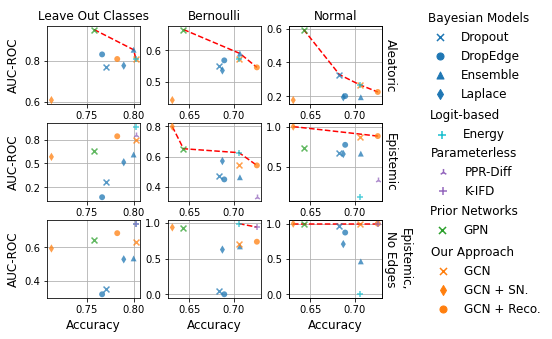

In [39]:
from functools import cmp_to_key
def pareto_front(xs, ys):
    xy = list(set(zip(xs, ys)))
    fx, fy = [], []
    for idx, (x, y) in enumerate(xy):
        is_dominated = False
        for j, (xj, yj) in enumerate(xy):
            if idx == j: continue 
            if xj >= x and yj > y:
                is_dominated = True
                break
        if not is_dominated:
            fx.append(x)
            fy.append(y)
    fxy = list(zip(fx, fy))
    def cmp(a, b):
        xa, ya = a
        xb, yb = b
        if xa == xb:
            return yb - ya
        else:
            return xa - xb
    fxy = np.array(sorted(fxy, key=cmp_to_key(cmp)))
    return fxy[:, 0], fxy[:, 1]
    
    
    

def pareto_plot(data, x_name, y_name, xlim=(0.55, 0.88), x_label=None, y_label=None, collabels=None, x_best_is_nan=True):
    
    fig, axs = plt.subplots(3, 3, figsize=(6, 5), gridspec_kw = {
            'wspace' : 0.3, 'hspace' : 0.25,
        'width_ratios' : [0.8] * 3,
    }, sharex=False, sharey=False)
    
    proxy_axs = axs[:, :3]
    data = data.copy()
    
    model_type_to_color_and_marker = {
        DROPOUT : ('tab:blue', 'x'),
        DROP_EDGE : ('tab:blue', 'o'),
        LAPALCE : ('tab:blue', 'd'),
        ENSEMBLE : ('tab:blue', '^'),
        VGCN : ('tab:orange', 'x'),
        GCN_RECO : ('tab:orange', 'o'),
        GCN_SN : ('tab:orange', 'd'),
        ENERGY : ('tab:cyan', '+'),
        GPN : ('tab:green', 'x'),
        PPR : ('tab:purple', '2'),
        INPUTS : ('tab:purple', '+'),
    }
    
    if y_label is None:
        y_label = y_name
    if x_label is None:
        x_label = x_name
    if collabels is None:
        collabels = (LOC, BERNOULLI, NORMAL)
    
    for col_idx, (col, col_label) in enumerate(zip((LOC, BERNOULLI, NORMAL), collabels)):
        for row_idx, (proxy, no_edges) in enumerate(((ALEATORIC, False), (EPISTEMIC, False), (EPISTEMIC, True))):
            ax = proxy_axs[row_idx, col_idx]
            
            if col_idx == (proxy_axs.shape[1] - 1):
                # Twin label
                tax = ax.twinx()
                proxy_name = proxy
                labelpad = 15
                if no_edges:
                    proxy_name += ',\nNo Edges'
                    labelpad += 15
                
                tax.set_ylabel(proxy_name, fontsize=12, rotation=270, 
                               labelpad=labelpad)
                tax.tick_params(axis='y', labelright=False, right=False)   
                
            if row_idx == 0:
                ax.set_title(col_label, fontsize=12)
            
            # For the pareto front, collect all xs and ys
            all_xs, all_ys = [], []
            all_colors, all_markers = [], []
            for model_type, (color, marker) in model_type_to_color_and_marker.items():
                data_rc = data[
                    (data[EXPERIMENT] == col)
                    & (data[PROXY] == proxy)
                    & (data[NO_EDGES] == no_edges)
                    & (data[MODEL] == model_type)
                ]
                assert data_rc.shape[0] <= 9, str(data_rc.shape[0])

                x, y = data_rc[x_name].mean(), data_rc[y_name].mean()
                all_xs.append(x)
                all_ys.append(y)
                all_colors.append(color)
                all_markers.append(marker)
            
            
            if x_best_is_nan:
                # replace nan on the x axis with the best value
                x_best = np.nanmax(all_xs)
                all_xs = [x if np.isfinite(x) else x_best for x in all_xs]
                
            
                
            from matplotlib.ticker import FormatStrFormatter
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            
            
            for x, y, color, marker in zip(all_xs, all_ys, all_colors, all_markers):
                sc = ax.scatter([x], [y], c=color, marker=marker, alpha=.75, zorder=4, s=35)
                if marker not in ('x', '+', '2'):
                    sc.set_edgecolor('none')
            
            
            # Plot the pareto front
            all_xs, all_ys = zip(*((x, y) for x, y in zip(all_xs, all_ys) if np.isfinite(x) and np.isfinite(y)))
            xf, yf = pareto_front(all_xs, all_ys)
            ax.plot(xf[np.argsort(xf)], yf[np.argsort(xf)], c='red', ls='--')
            ax.set_xlim(*xlim)
            
            
    for ax in proxy_axs.flatten():
        ax.grid(which='major')
    for ax in proxy_axs[-1, :].flatten():
        ax.set_xlabel(x_label, fontsize=12)
    for ax in proxy_axs[:, 0].flatten():
        ax.set_ylabel(y_label, fontsize=12)
        
    lleft = 0.03
    s = 50
    handles, labels = [], []
    for model in (DROPOUT, DROP_EDGE, ENSEMBLE, LAPALCE):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Bayesian Models', 
                        bbox_to_anchor=(1.235 + lleft, .95))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    
    handles, labels = [], []
    for model in (GPN,):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Prior Networks', 
                        bbox_to_anchor=(1.21 + lleft, .415))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    
    handles, labels = [], []
    for model in (ENERGY,):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Logit-based', 
                        bbox_to_anchor=(1.18 + lleft, .68))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    
    handles, labels = [], []
    for model in (PPR, INPUTS):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Parameterless', 
                        bbox_to_anchor=(1.208 + lleft, .575))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    handles, labels = [], []
    for model in (VGCN, GCN_SN, GCN_RECO):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Our Approach', 
                        bbox_to_anchor=(1.2625 + lleft, .30))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    return fig, axs

fig, axs = pareto_plot(df_ood[
            (df_ood[DATASET] == dc.CITESEER) &
            (df_ood[SETTING] == HYBRID)
        ], ACCURACY, OOD_AUROC, xlim=(None, None), y_label='AUC-ROC', collabels=['Leave Out Classes', 'Bernoulli', 'Normal'])
        

thesis_nbs/baseline_plots/pareto-inductive-cora_full-accuracy-auroc.pdf
thesis_nbs/baseline_plots/pareto-transductive-cora_full-accuracy-auroc.pdf
thesis_nbs/baseline_plots/pareto-inductive-citeseer-accuracy-auroc.pdf
thesis_nbs/baseline_plots/pareto-transductive-citeseer-accuracy-auroc.pdf
thesis_nbs/baseline_plots/pareto-inductive-pubmed-accuracy-auroc.pdf
thesis_nbs/baseline_plots/pareto-transductive-pubmed-accuracy-auroc.pdf
thesis_nbs/baseline_plots/pareto-inductive-coauthor_cs-accuracy-auroc.pdf
thesis_nbs/baseline_plots/pareto-transductive-coauthor_cs-accuracy-auroc.pdf
thesis_nbs/baseline_plots/pareto-inductive-amazon_photo-accuracy-auroc.pdf
thesis_nbs/baseline_plots/pareto-transductive-amazon_photo-accuracy-auroc.pdf


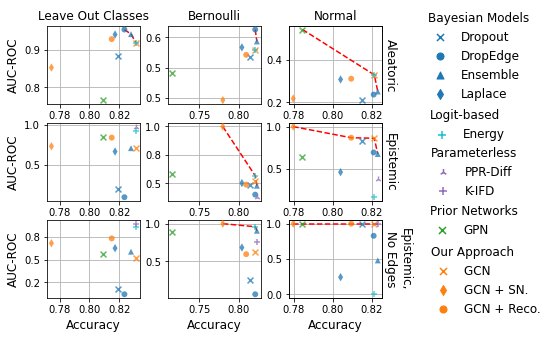

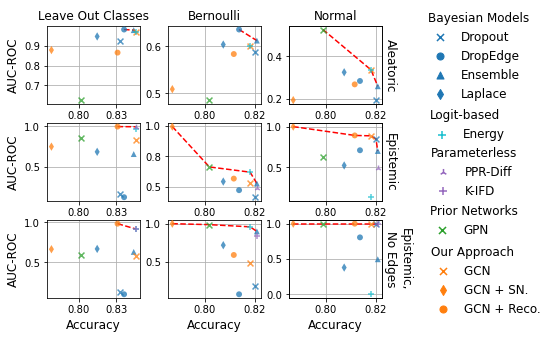

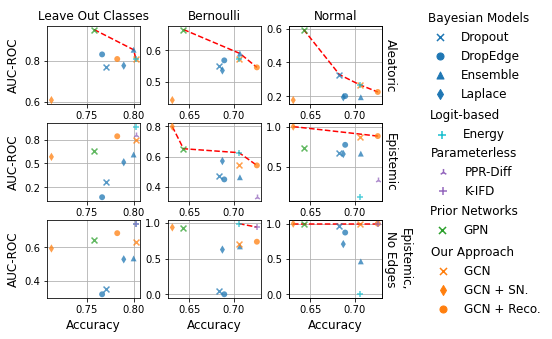

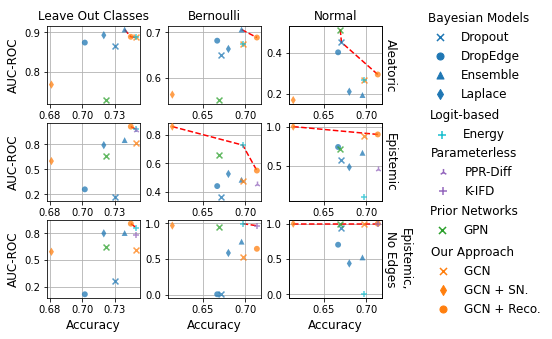

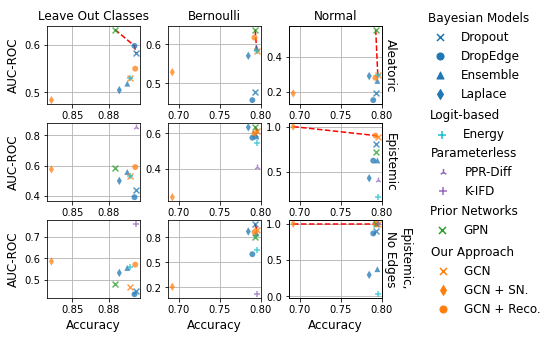

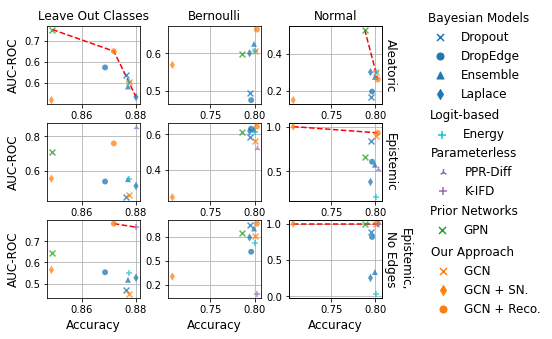

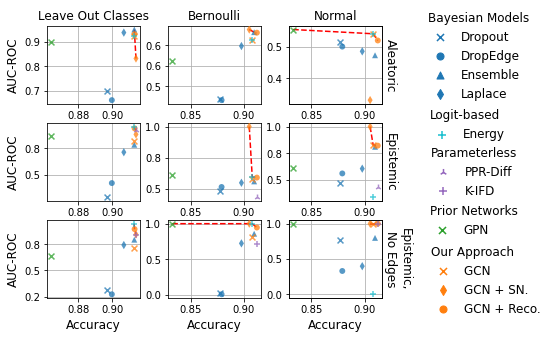

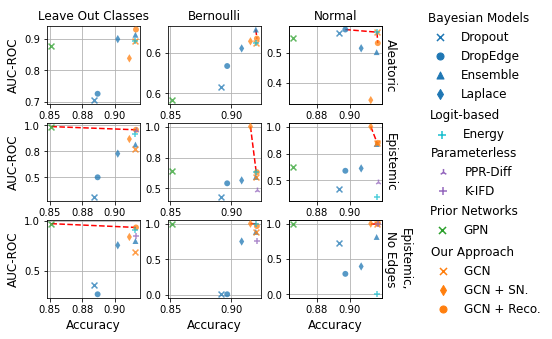

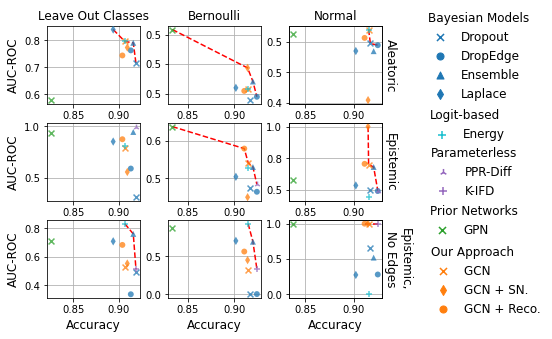

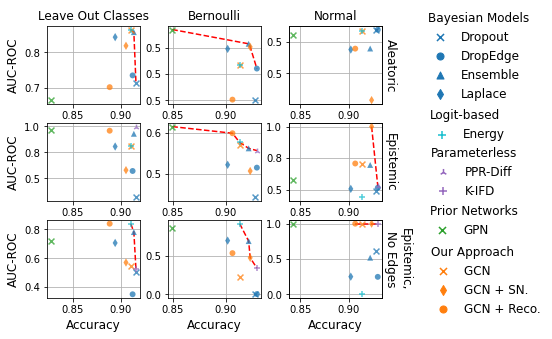

In [40]:
for dataset in (dc.CORA_FULL, dc.CITESEER, dc.PUBMED, dc.COAUTHOR_CS, dc.AMAZON_PHOTO):
    for setting in (HYBRID, TRANSDUCTIVE):
        fig, axs = pareto_plot(df_ood[
            (df_ood[DATASET] == dataset) &
            (df_ood[SETTING] == setting)
        ], ACCURACY, OOD_AUROC, xlim=(None, None), y_label='AUC-ROC', collabels=['Leave Out Classes', 'Bernoulli', 'Normal'])
        
        path = f'thesis_nbs/baseline_plots/pareto-{setting.lower()}-{dataset}-accuracy-auroc.pdf'
        fig.savefig(path, bbox_inches='tight')
        print(path)
        


In [41]:
3

3

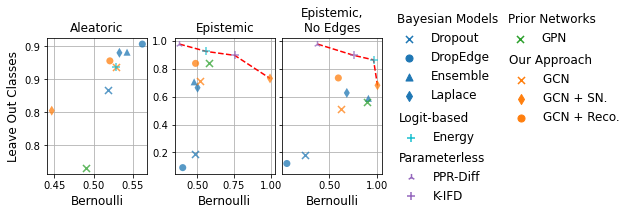

In [203]:
def pareto_plot_loc_ber(data, metric, x_metric=BERNOULLI, y_metric=LOC, x_label=None, y_label=None, 
                        colnames=['Aleatoric', 'Epistemic', 'Epistemic,\nNo Edges'],
                       colorder = [(ALEATORIC, False), (EPISTEMIC, False), (EPISTEMIC, True)]):
    
    fig, axs = plt.subplots(1, 4, figsize=(6, 2.5), gridspec_kw = {
            'wspace' : 0.1, 'hspace' : 0.0,
        'width_ratios' : [0.8, 0.1, 0.8, 0.8] ,
    }, sharex=False, sharey=False, squeeze=False)
    
    proxy_axs = axs[:, [0, 2, 3]]
    data = data.copy()
    
    model_type_to_color_and_marker = {
        DROPOUT : ('tab:blue', 'x'),
        DROP_EDGE : ('tab:blue', 'o'),
        LAPALCE : ('tab:blue', 'd'),
        ENSEMBLE : ('tab:blue', '^'),
        VGCN : ('tab:orange', 'x'),
        GCN_RECO : ('tab:orange', 'o'),
        GCN_SN : ('tab:orange', 'd'),
        ENERGY : ('tab:cyan', '+'),
        GPN : ('tab:green', 'x'),
        PPR : ('tab:purple', '2'),
        INPUTS : ('tab:purple', '+'),
    }
    
    scores = {}
    
    for model in model_type_to_color_and_marker:
        for (proxy, no_edges) in colorder:
            data_mp = data[
                (data[MODEL] == model) &
                (data[PROXY] == proxy) &
                (data[NO_EDGES] == no_edges)
            ]
            for exp in (x_metric, y_metric):
                assert (model, proxy, no_edges, exp) not in scores
                scores[(model, proxy, no_edges, exp)] = np.mean(data_mp[
                    (data_mp[EXPERIMENT] == exp)
                ][metric])
            
            
    # The PPR and INPUTS models do not disentangle
    for exp in (x_metric, y_metric):
        assert ~np.isfinite(scores[(PPR, EPISTEMIC, True, exp)])
        scores[(PPR, EPISTEMIC, True, exp)] = scores[(PPR, EPISTEMIC, False, exp)]
    for exp in (x_metric, y_metric):
        assert ~np.isfinite(scores[(INPUTS, EPISTEMIC, False, exp)])
        scores[(INPUTS, EPISTEMIC, False, exp)] = scores[(INPUTS, EPISTEMIC, True, exp)]
        
    for idx, (colname, (proxy, no_edges)) in enumerate(zip(colnames, colorder)):
        ax = proxy_axs[0, idx]
        all_xs, all_ys = [], []
        for model, (color, marker) in model_type_to_color_and_marker.items():
            x = scores[(model, proxy, no_edges, x_metric)]
            y = scores[(model, proxy, no_edges, y_metric)]
            sc = ax.scatter([x], [y], c=color, marker=marker, alpha=.75, zorder=4, s=50)
            if marker not in ('x', '+', '2'):
                sc.set_edgecolor('none')
            all_xs.append(x)
            all_ys.append(y)
        
        # Plot the pareto front
        all_xs, all_ys = zip(*((x, y) for x, y in zip(all_xs, all_ys) if np.isfinite(x) and np.isfinite(y)))
        xf, yf = pareto_front(all_xs, all_ys)
        ax.plot(xf[np.argsort(xf)], yf[np.argsort(xf)], c='red', ls='--')
        
        
        from matplotlib.ticker import FormatStrFormatter
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        
    axs[0, 1].set_visible(False)
    lims = list(zip(proxy_axs[0, 1].get_ylim(), proxy_axs[0, 2].get_ylim()))
    proxy_axs[0, 1].set_ylim(min(lims[0]), max(lims[1]))
    proxy_axs[0, 2].set_ylim(min(lims[0]), max(lims[1]))
    proxy_axs[0, 2].set_yticklabels([])
    
    
    for ax in proxy_axs.flatten():
        ax.grid(which='major')
    
    for ax in proxy_axs[-1, :].flatten():
        ax.set_xlabel(x_label, fontsize=12)
    for ax in proxy_axs[:, 0].flatten():
        ax.set_ylabel(y_label, fontsize=12)
    for idx, colname in enumerate(colnames):
        proxy_axs[0, idx].set_title(colname, fontsize=12)
        
    lleft = 0.075
    lup = 0.13
    s = 50
    handles, labels = [], []
    for model in (DROPOUT, DROP_EDGE, ENSEMBLE, LAPALCE):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Bayesian Models', 
                        bbox_to_anchor=(1.12 + lleft, .95 + lup))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    
    handles, labels = [], []
    for model in (ENERGY,):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Logit-based', 
                        bbox_to_anchor=(1.065 + lleft, .40 + lup))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    
    handles, labels = [], []
    for model in (PPR, INPUTS):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Parameterless', 
                        bbox_to_anchor=(1.090 + lleft, .18 + lup))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    
    handles, labels = [], []
    for model in (GPN,):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Prior Networks', 
                        bbox_to_anchor=(1.345 + lleft, .95 + lup))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    handles, labels = [], []
    for model in (VGCN, GCN_SN, GCN_RECO):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Our Approach', 
                        bbox_to_anchor=(1.40 + lleft, .72 + lup))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    return fig, axs

fig, axs = pareto_plot_loc_ber(df_ood[
            (df_ood[DATASET] == dc.CORA_FULL) &
            (df_ood[SETTING] == HYBRID)
        ], OOD_AUROC, x_metric=BERNOULLI, y_metric=LOC, x_label='Bernoulli', y_label='Leave Out Classes')
        

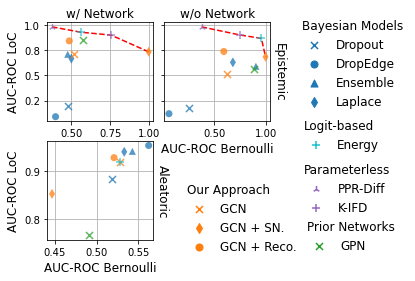

In [296]:
def pareto_plot_loc_ber(data, metric, x_metric=BERNOULLI, y_metric=LOC, x_label=None, y_label=None, 
                        rownames=['Epistemic', 'Aleatoric'],
                       colorder = [(EPISTEMIC, False), (EPISTEMIC, True), (ALEATORIC, False), ]):
    
    fig, axs = plt.subplots(2, 2, figsize=(4, 4), gridspec_kw = {
            'wspace' : 0.1, 'hspace' : 0.2,
    }, sharex=False, sharey='row', squeeze=False)
    
    proxy_axs = axs.flatten()[:3]
    data = data.copy()
    
    model_type_to_color_and_marker = {
        DROPOUT : ('tab:blue', 'x'),
        DROP_EDGE : ('tab:blue', 'o'),
        LAPALCE : ('tab:blue', 'd'),
        ENSEMBLE : ('tab:blue', '^'),
        VGCN : ('tab:orange', 'x'),
        GCN_RECO : ('tab:orange', 'o'),
        GCN_SN : ('tab:orange', 'd'),
        ENERGY : ('tab:cyan', '+'),
        GPN : ('tab:green', 'x'),
        PPR : ('tab:purple', '2'),
        INPUTS : ('tab:purple', '+'),
    }
    
    scores = {}
    
    for model in model_type_to_color_and_marker:
        for (proxy, no_edges) in colorder:
            data_mp = data[
                (data[MODEL] == model) &
                (data[PROXY] == proxy) &
                (data[NO_EDGES] == no_edges)
            ]
            for exp in (x_metric, y_metric):
                assert (model, proxy, no_edges, exp) not in scores
                scores[(model, proxy, no_edges, exp)] = np.mean(data_mp[
                    (data_mp[EXPERIMENT] == exp)
                ][metric])
            
            
    # The PPR and INPUTS models do not disentangle
    for exp in (x_metric, y_metric):
        assert ~np.isfinite(scores[(PPR, EPISTEMIC, True, exp)])
        scores[(PPR, EPISTEMIC, True, exp)] = scores[(PPR, EPISTEMIC, False, exp)]
    for exp in (x_metric, y_metric):
        assert ~np.isfinite(scores[(INPUTS, EPISTEMIC, False, exp)])
        scores[(INPUTS, EPISTEMIC, False, exp)] = scores[(INPUTS, EPISTEMIC, True, exp)]
        
    for idx, (proxy, no_edges) in enumerate(colorder):
        ax = proxy_axs[idx]
        all_xs, all_ys = [], []
        for model, (color, marker) in model_type_to_color_and_marker.items():
            x = scores[(model, proxy, no_edges, x_metric)]
            y = scores[(model, proxy, no_edges, y_metric)]
            sc = ax.scatter([x], [y], c=color, marker=marker, alpha=.75, zorder=4, s=50)
            if marker not in ('x', '+', '2'):
                sc.set_edgecolor('none')
            all_xs.append(x)
            all_ys.append(y)
        
        # Plot the pareto front
        all_xs, all_ys = zip(*((x, y) for x, y in zip(all_xs, all_ys) if np.isfinite(x) and np.isfinite(y)))
        xf, yf = pareto_front(all_xs, all_ys)
        ax.plot(xf[np.argsort(xf)], yf[np.argsort(xf)], c='red', ls='--')
        
        
        from matplotlib.ticker import FormatStrFormatter
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    for ax in proxy_axs.flatten():
        ax.grid(which='major')
    
    for ax in [axs[0, 1], axs[1, 0]]:
        ax.set_xlabel(x_label, fontsize=12)
    for ax in axs[:, 0].flatten():
        ax.set_ylabel(y_label, fontsize=12)
    for idx, rowname in enumerate(rownames):
        
        ax2 = [axs[0, 1], axs[1, 0]][idx].twinx()
        labelpad = 15
        if '\n' in rowname:
            labelpad += 15
        ax2.set_ylabel(rowname, fontsize=12, rotation=270, labelpad=labelpad)
        ax2.set_yticks([])
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)
        ax2.spines['left'].set_visible(False)

    axs[0, 0].set_title('w/ Network', fontsize=12)
    axs[0, 1].set_title('w/o Network', fontsize=12)
        

    axs[-1, -1].set_visible(False)
        
    lleft = 0.15
    lup = 0.13
    s = 50
    
    
    
    
    handles, labels = [], []
    for model in (DROPOUT, DROP_EDGE, ENSEMBLE, LAPALCE):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Bayesian Models', 
                        bbox_to_anchor=(1.25 + lleft, .8 + lup))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    handles, labels = [], []
    for model in (ENERGY,):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Logit-based', 
                        bbox_to_anchor=(1.165 + lleft, .45 + lup))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    handles, labels = [], []
    for model in (PPR, INPUTS):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Parameterless', 
                        bbox_to_anchor=(1.205 + lleft, .30 + lup))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    handles, labels = [], []
    for model in (GPN,):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Prior Networks', 
                        bbox_to_anchor=(1.22 + lleft, .10 + lup))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    handles, labels = [], []
    for model in (VGCN, GCN_SN, GCN_RECO):
        col, marker = model_type_to_color_and_marker[model]
        handles.append(axs[-1, -1].scatter([], [], marker=marker, c=col, s=s))
        labels.append(model)
    legend = fig.legend(handles, labels, frameon=False, fontsize=12, title='Our Approach', 
                        bbox_to_anchor=(0.88 + lleft, .23 + lup))
    plt.setp(legend.get_title(),fontsize=12)
    legend._legend_box.align = "left"
    
    
    return fig, axs

fig, axs = pareto_plot_loc_ber(df_ood[
            (df_ood[DATASET] == dc.CORA_FULL) &
            (df_ood[SETTING] == HYBRID)
        ], OOD_AUROC, x_metric=BERNOULLI, y_metric=LOC, x_label='AUC-ROC Bernoulli', y_label='AUC-ROC LoC')
        

thesis_nbs/baseline_plots/pareto-inductive-cora_full-loc-ber.pdf
thesis_nbs/baseline_plots/pareto-transductive-cora_full-loc-ber.pdf
thesis_nbs/baseline_plots/pareto-inductive-citeseer-loc-ber.pdf
thesis_nbs/baseline_plots/pareto-transductive-citeseer-loc-ber.pdf
thesis_nbs/baseline_plots/pareto-inductive-pubmed-loc-ber.pdf
thesis_nbs/baseline_plots/pareto-transductive-pubmed-loc-ber.pdf
thesis_nbs/baseline_plots/pareto-inductive-coauthor_cs-loc-ber.pdf
thesis_nbs/baseline_plots/pareto-transductive-coauthor_cs-loc-ber.pdf
thesis_nbs/baseline_plots/pareto-inductive-amazon_photo-loc-ber.pdf
thesis_nbs/baseline_plots/pareto-transductive-amazon_photo-loc-ber.pdf


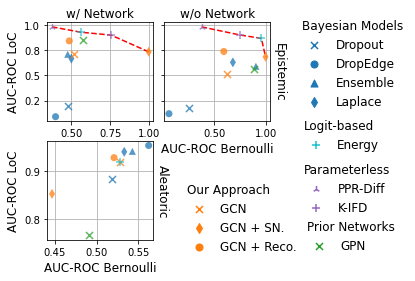

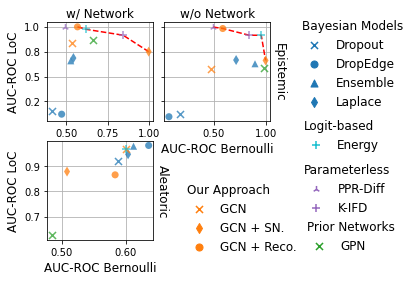

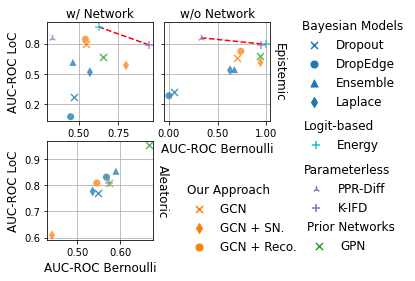

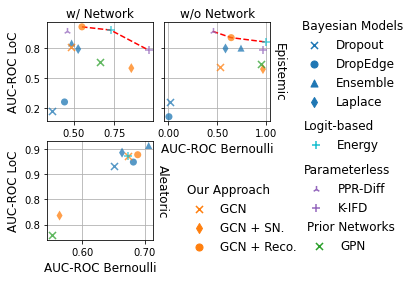

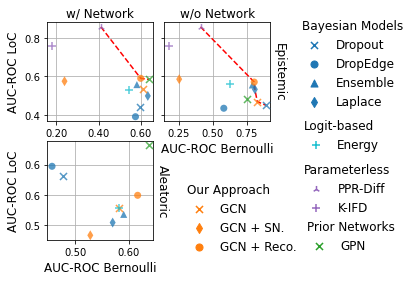

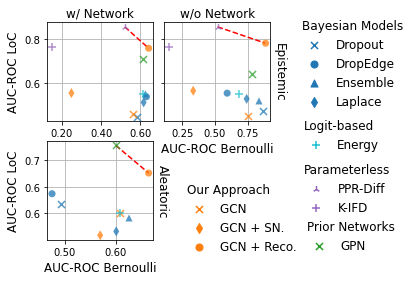

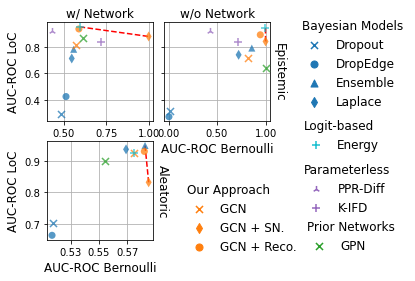

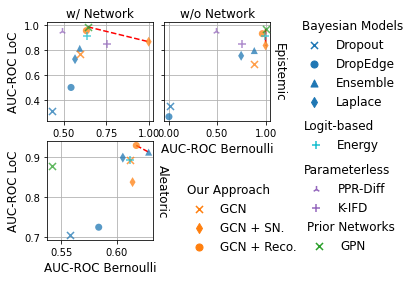

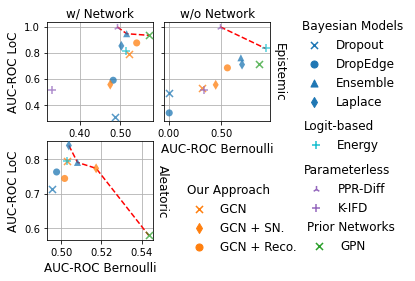

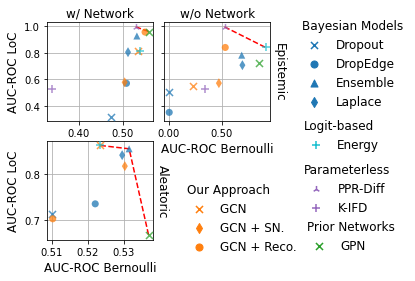

In [298]:
for dataset in (dc.CORA_FULL, dc.CITESEER, dc.PUBMED, dc.COAUTHOR_CS, dc.AMAZON_PHOTO):
    for setting in (HYBRID, TRANSDUCTIVE):
        fig, ax = pareto_plot_loc_ber(df_ood[
            (df_ood[DATASET] == dataset) &
            (df_ood[SETTING] == setting)
        ], OOD_AUROC, x_metric=BERNOULLI, y_metric=LOC, x_label='AUC-ROC Bernoulli', y_label='AUC-ROC LoC')
        
        path = f'thesis_nbs/baseline_plots/pareto-{setting.lower()}-{dataset}-loc-ber.pdf'
        fig.savefig(path, bbox_inches='tight')
        print(path)